# **Twitter Sentiment Analysis Project**
This project analyzes a dataset of tweets and classifies them as either negative or positive.

# Data Setup

https://www.kaggle.com/code/paoloripamonti/twitter-sentiment-analysis

1. target: the polarity of the tweet (0 = negative, 4 = positive)
2. ids: The id of the tweet ( 2087)
3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.
5. user: the user that tweeted (robotickilldozr)
6. text: the text of the tweet (Lyx is cool)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_df.csv to sentiment_df.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
# read csv file
df = pd.read_csv("sentiment_df.csv", header=None)

In [ ]:
# name the columns

df.columns =['target','id', 'date', 'flag', 'user', 'text']
df["target"] = df["target"].replace(4, 1)

In [ ]:
df.head(3)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467839405,Mon Apr 06 22:27:15 PDT 2009,NO_QUERY,Jonas_Dreamgirl,@HibaNick yeah aw but i know i wudnt stand a c...
2,0,1468079019,Mon Apr 06 23:35:54 PDT 2009,NO_QUERY,miseducatedone,is ready to go to bed..long day tomorrow


In [ ]:
print("Min Date: {}".format(min(df.date)))
print("Max Date: {}".format(max(df.date)))

Min Date: Fri Apr 17 20:32:16 PDT 2009
Max Date: Wed May 27 07:27:38 PDT 2009


In [ ]:
df.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.flag.value_counts()

NO_QUERY    2001
Name: flag, dtype: int64

In [ ]:
df = df.drop('flag', axis=1)

# Process the Data

1. Check for duplicates
2. Remove URLs, mentions, and special characters
3. Convert to lowercase for consistency
4. Remove common words ("and", "is", "the")
5. Tokenize the words
6. Apply stemming or lemmatization to reduce the words
7. Remove contractions ("aren't --> "are not")

### Standardize text format

In [ ]:
# Check if any adjacent rows are equal

sum(df.text.eq(df.text.shift()))

0

In [ ]:
# Check if any duplicate rows at all

sum(df.duplicated())

0

In [ ]:
df["text"] = df["text"].str.replace(r'@\w+', '', regex=True)

# r'@\w+' - This pattern matches words starting with "@" symbol. "\w+" matches one or more word characters (letters, digits, or underscores).

# remove extra spaces
df["text"] = df.text.str.strip()

In [ ]:
df['text'] = df['text'].str.replace(r'http\S+|www\S+', '', regex=True)

# r'http\S+' - This pattern matches URLs starting with 'http' and followed by non-whitespace characters.
# r'www\S+' - This pattern matches URLs starting with 'www' and followed by non-whitespace characters.

# remove extra white space
df["text"] = df["text"].str.strip()

In [ ]:
df["text"] = df["text"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# r'[^\w\s]' - This pattern matches any character that is not a word character (alphanumeric or underscore) or whitespace.

# remove extra white space
df["text"] = df["text"].str.strip()

In [ ]:
df["text"] = df["text"].str.lower()

In [ ]:
df.iloc[:6]

,target,id,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,a thats a bummer you shoulda got david carr o...
1,0,1467839405,Mon Apr 06 22:27:15 PDT 2009,Jonas_Dreamgirl,yeah aw but i know i wudnt stand a chance
2,0,1468079019,Mon Apr 06 23:35:54 PDT 2009,miseducatedone,is ready to go to bedlong day tomorrow
3,0,1468259941,Tue Apr 07 00:36:00 PDT 2009,09020084,has to study math 4 econ but isnt in the mood
4,0,1468380736,Tue Apr 07 01:19:09 PDT 2009,warrenbuckley,ouch zoom1 and the clearfix method are your f...
5,0,1468409096,Tue Apr 07 01:29:31 PDT 2009,jogabenita,jamming postponed again boohoohoozx damn you f...


### Remove common words

In [ ]:
words_to_remove = ["and", "the", "is", "are", "a"]

# Combine the words to remove into a regular expression pattern
pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))

df["text"] = df["text"].str.replace(pattern, '', regex=True)

# remove extra spaces
df["text"] = df["text"].str.strip()

In [ ]:
df.head(4)

,target,id,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,thats bummer you shoulda got david carr of t...
1,0,1467839405,Mon Apr 06 22:27:15 PDT 2009,Jonas_Dreamgirl,yeah aw but i know i wudnt stand chance
2,0,1468079019,Mon Apr 06 23:35:54 PDT 2009,miseducatedone,ready to go to bedlong day tomorrow
3,0,1468259941,Tue Apr 07 00:36:00 PDT 2009,09020084,has to study math 4 econ but isnt in mood


### Tokenization

In [ ]:
# Tokenize based on white space
df["token"] = df["text"].str.split()

In [ ]:
df.iloc[1800:1804]

,target,id,date,user,text,token
1800,1,2061249983,Sat Jun 06 20:28:54 PDT 2009,toiplusmoi,currently watching star trek search for spock,"[currently, watching, star, trek, search, for,..."
1801,1,2061410182,Sat Jun 06 20:48:38 PDT 2009,mjmeshkoff,i cant wait to hit up petco park in july,"[i, cant, wait, to, hit, up, petco, park, in, ..."
1802,1,2061410340,Sat Jun 06 20:48:40 PDT 2009,msususieq,good deal tell her hey for me hope yall had g...,"[good, deal, tell, her, hey, for, me, hope, ya..."
1803,1,2061444913,Sat Jun 06 20:53:05 PDT 2009,SarahLeighAnn84,lol if only did get an advanced copy of quotbu...,"[lol, if, only, did, get, an, advanced, copy, ..."


### Lemmatization

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply the lemmatize_tokens function to the 'token' column
df['lemma'] = df['token'].apply(lemmatize_tokens)

In [ ]:
df.head(3)

,target,id,date,user,text,token,lemma
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,thats bummer you shoulda got david carr of t...,"[thats, bummer, you, shoulda, got, david, carr...",thats bummer you shoulda got david carr of thi...
1,0,1467839405,Mon Apr 06 22:27:15 PDT 2009,Jonas_Dreamgirl,yeah aw but i know i wudnt stand chance,"[yeah, aw, but, i, know, i, wudnt, stand, chance]",yeah aw but i know i wudnt stand chance
2,0,1468079019,Mon Apr 06 23:35:54 PDT 2009,miseducatedone,ready to go to bedlong day tomorrow,"[ready, to, go, to, bedlong, day, tomorrow]",ready to go to bedlong day tomorrow


In [ ]:
df.dtypes

target     int64
id         int64
date      object
user      object
text      object
token     object
lemma     object
dtype: object

In [ ]:
df.target.value_counts()

1    1038
0     963
Name: target, dtype: int64

In [ ]:
df.lemma.mode()

0    get 100 follower day using once you add everyo...
1              i am lost please help me find good home
2                                        my tummy hurt
Name: lemma, dtype: object

In [ ]:
df = df.drop_duplicates(subset=['lemma'])

In [ ]:
len(df)

1992

In [ ]:
df.lemma.mode()

# now all rows are unique

0                                                        
1       1 it with my family 2 it musical haha aww that...
2       11 year old neice will be starring a tallulah ...
3         17 minute til i leave work wooo what boring day
4       2 day till we meet again yeah id say we got sa...
                              ...                        
1987              yup i miss obi best dick in my life whe
1988    yup this week hindi ko p nga alam e ill call d...
1989    yup we slept already haha we left you oh twitt...
1990    ðññðð¾ð½ ñð¾ ñðñðð¹ñð¾ð¼ ð ðµñðµ ðñññðµ ðððµðº...
1991     ù ø³ùùùùùùùùùùùùùùùùùùùùùùùùùùùùùùùù ù ø³ùùùùùùù
Name: lemma, Length: 1992, dtype: object

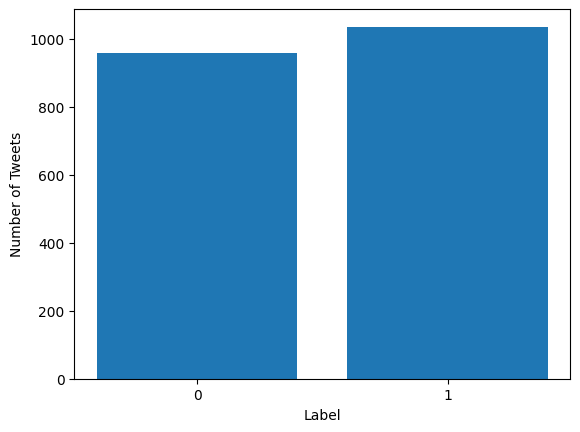

In [ ]:
plt.bar(df["target"].value_counts().index, df["target"].value_counts().values)
plt.xticks(df["target"].value_counts().index, df["target"].value_counts().index)
plt.ylabel("Number of Tweets")
plt.xlabel("Label")
print()

# Expand Contractions

In [ ]:
# dictionary of contractions, no apostrophes (removed already)
contractions_dict = {"aint": "are not", \
                    "arent": "are not", \
                    "isnt": "is not", \
                    "dont": "do not",
                    "doesnt": "does not", \
                    "wouldnt": "would not", \
                    "couldnt": "could not", \
                    "shouldnt": "should not"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# apply to lemma column
df['expand'] = df['lemma'].apply(lambda x:expand_contractions(x))

In [ ]:
df[df["lemma"] != df["expand"]]

# there were a lot of rows with contractions

,target,id,date,user,text,token,lemma,expand
3,0,1468259941,Tue Apr 07 00:36:00 PDT 2009,09020084,has to study math 4 econ but isnt in mood,"[has, to, study, math, 4, econ, but, isnt, in,...",ha to study math 4 econ but isnt in mood,ha to study math 4 econ but is not in mood
20,0,1553428881,Sat Apr 18 14:14:32 PDT 2009,skadaughter,there isnt anything to do today,"[there, isnt, anything, to, do, today]",there isnt anything to do today,there is not anything to do today
23,0,1555923619,Sat Apr 18 21:05:32 PDT 2009,epiclauraa,wow i wish i couldve gone that sounds awesome...,"[wow, i, wish, i, couldve, gone, that, sounds,...",wow i wish i couldve gone that sound awesome w...,wow i wish i couldve gone that sound awesome w...
39,0,1559002683,Sun Apr 19 09:59:47 PDT 2009,mini4marie,omg i really just dont feel like studying,"[omg, i, really, just, dont, feel, like, study...",omg i really just dont feel like studying,omg i really just do not feel like studying
50,0,1565953121,Mon Apr 20 07:54:38 PDT 2009,leewaters,some captchas provide an alternate sound optio...,"[some, captchas, provide, an, alternate, sound...",some captchas provide an alternate sound optio...,some captchas provide an alternate sound optio...
...,...,...,...,...,...,...,...,...
1940,1,2179431012,Mon Jun 15 09:05:38 PDT 2009,KalaniThomas,i dont think anyones really said this before b...,"[i, dont, think, anyones, really, said, this, ...",i dont think anyones really said this before b...,i do not think anyones really said this before...
1943,1,2180747962,Mon Jun 15 10:53:28 PDT 2009,JeffreyHite,i dont think so if they were gw bush would hav...,"[i, dont, think, so, if, they, were, gw, bush,...",i dont think so if they were gw bush would hav...,i do not think so if they were gw bush would h...
1951,1,2182200725,Mon Jun 15 12:51:22 PDT 2009,shugdoo_umeka,hey yall been real busy but i aint 4got about ...,"[hey, yall, been, real, busy, but, i, aint, 4g...",hey yall been real busy but i aint 4got about ...,hey yall been real busy but i are not 4got abo...
1958,1,2183428552,Mon Jun 15 14:29:36 PDT 2009,waynekelly,my motivational monday interview for working m...,"[my, motivational, monday, interview, for, wor...",my motivational monday interview for working m...,my motivational monday interview for working m...


In [ ]:
df1 = df.copy()

# Sentiment Analysis

## Featurization

In [ ]:
df = df1.copy()

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: shuffle the df
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: split into training and remaining sets (60% - 40%)
train, remaining_df = train_test_split(df_shuffled, test_size=0.4, random_state=42)

# Step 3: split the remaining set into validation and test sets (50% - 50%)
valid, test = train_test_split(remaining_df, test_size=0.5, random_state=42)

# reset index
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 500)

# fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(df["expand"])

# tfidf_features is a sparse matrix containing the TF-IDF features for each sentence.

# convert the sparse matrix to a dense numpy array
tfidf_features_array = tfidf_features.toarray()

combined_features = tfidf_features_array


In [ ]:
max(combined_features[1])

0.6558169707032342

In [ ]:
combined_features.shape

(1992, 500)

In [ ]:
import pandas as pd
import numpy as np

combined_features_df = pd.DataFrame(combined_features)

# Step 1: check the shapes of both DataFrames
print(df.shape)  # Check the shape of 'df'
print(combined_features_df.shape)  # Check the shape of 'combined_features_df'

# Step 2: if the number of rows doesn't match, adjust the DataFrames accordingly.
# for example, if 'combined_features' has more rows, truncate it to match the number of rows in 'df'
combined_features_df = combined_features_df.iloc[:df.shape[0], :]

# Step 3: flatten the lists in 'combined_features_df'
combined_features_df = combined_features_df.applymap(lambda x: x[0] if isinstance(x, list) else x)

# Step 4: reset the index of both DataFrames
df.reset_index(drop=True, inplace=True)
combined_features_df.reset_index(drop=True, inplace=True)

# Step 5: concatenate the DataFrames
df_combined = pd.concat([df, combined_features_df], axis=1)

print(df_combined.shape)  # This should now print (1992, 508): 500 features + 8 original cols


(1992, 8)
(1992, 500)
(1992, 508)


In [ ]:
df_combined.head(3)

,target,id,date,user,text,token,lemma,expand,0,1,...,490,491,492,493,494,495,496,497,498,499
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,thats bummer you shoulda got david carr of t...,"[thats, bummer, you, shoulda, got, david, carr...",thats bummer you shoulda got david carr of thi...,thats bummer you shoulda got david carr of thi...,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.29938,0.0,0.0
1,0,1467839405,Mon Apr 06 22:27:15 PDT 2009,Jonas_Dreamgirl,yeah aw but i know i wudnt stand chance,"[yeah, aw, but, i, know, i, wudnt, stand, chance]",yeah aw but i know i wudnt stand chance,yeah aw but i know i wudnt stand chance,0.0,0.0,...,0.0,0.0,0.0,0.655817,0.0,0.0,0.0,0.00000,0.0,0.0
2,0,1468079019,Mon Apr 06 23:35:54 PDT 2009,miseducatedone,ready to go to bedlong day tomorrow,"[ready, to, go, to, bedlong, day, tomorrow]",ready to go to bedlong day tomorrow,ready to go to bedlong day tomorrow,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0


In [ ]:
df_combined.shape
# 7 original rows + 500 features

(1992, 508)

In [ ]:
df = df_combined.copy()

In [ ]:
df.tail(3)

,target,id,date,user,text,token,lemma,expand,0,1,...,490,491,492,493,494,495,496,497,498,499
1989,1,2193081038,Tue Jun 16 07:58:18 PDT 2009,danwalker91,loving weather,"[loving, weather]",loving weather,loving weather,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
1990,1,2193251552,Tue Jun 16 08:12:10 PDT 2009,HannahxBell,awakenot really but somewhat you finally foun...,"[awakenot, really, but, somewhat, you, finally...",awakenot really but somewhat you finally found...,awakenot really but somewhat you finally found...,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.387197,0.0,0.0
1991,1,2193280974,Tue Jun 16 08:14:37 PDT 2009,Westizzle,2 days till we meet again yeah id say we got ...,"[2, days, till, we, meet, again, yeah, id, say...",2 day till we meet again yeah id say we got sa...,2 day till we meet again yeah id say we got sa...,0.0,0.0,...,0.0,0.0,0.0,0.23464,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
df.columns

Index(['target',     'id',   'date',   'user',   'text',  'token',  'lemma',
       'expand',        0,        1,
       ...
            490,      491,      492,      493,      494,      495,      496,
            497,      498,      499],
      dtype='object', length=508)

# Df Splitting

## Without Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: split into features (X) and labels (y)
X = df['text']
y = df['target']

# Step 2: split into training and remaining sets (60% - 40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 3: split the remaining set into validation and test sets (50% - 50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# N-grams feature extraction
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Adjust n-gram range as needed
X_train_ngrams = ngram_vectorizer.fit_transform(X_train)
X_valid_ngrams = ngram_vectorizer.transform(X_valid)
X_test_ngrams = ngram_vectorizer.transform(X_test)

# 'X_valid_ngrams' and 'y_valid' for validation with n-grams,
# and 'X_test_ngrams' and 'y_test' for testing with n-grams.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# create the Naive Bayes classifier
classifier = MultinomialNB()

# train the model on the training data
classifier.fit(X_train_ngrams, y_train)

MultinomialNB()

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# create the grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# perform hyperparameter tuning on the training data
grid_search.fit(X_train_ngrams, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
from sklearn.metrics import accuracy_score

# make predictions on the validation set
y_pred = grid_search.predict(X_valid_ngrams)

# calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)


In [ ]:
accuracy

0.6482412060301508

In [ ]:
from sklearn.metrics import accuracy_score

# make predictions on the validation set
y_pred_valid = grid_search.predict(X_valid_ngrams)

# calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# make predictions on the test set
y_pred_test = grid_search.predict(X_test_ngrams)

# calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)


Validation Accuracy: 0.6482412060301508
Test Accuracy: 0.6641604010025063


## With ngrams

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your original DataFrame is named 'df' with a 'label' column as the target variable

# Step 1: Split into features (X) and labels (y)
X = df['lemma']  # Assuming the text column contains the tweet text
y = df['target']  # Series containing the 'label' column

# Step 2: Split into training and remaining sets (60% - 40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 3: Split the remaining set into validation and test sets (50% - 50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# N-grams feature extraction
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Adjust n-gram range as needed
X_train_ngrams = ngram_vectorizer.fit_transform(X_train)
X_valid_ngrams = ngram_vectorizer.transform(X_valid)
X_test_ngrams = ngram_vectorizer.transform(X_test)

# Now you have 'X_train_ngrams' and 'y_train' for training with n-grams,
# 'X_valid_ngrams' and 'y_valid' for validation with n-grams,
# and 'X_test_ngrams' and 'y_test' for testing with n-grams.
# 'y_test' should not be used during testing, as it contains the true labels.


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create the Naive Bayes classifier
classifier = MultinomialNB()

# Train the model on the training data
classifier.fit(X_train_ngrams, y_train)

MultinomialNB()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Create the grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train_ngrams, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
y_pred = grid_search.predict(X_valid_ngrams)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)


In [ ]:
accuracy

0.6381909547738693

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the validation set
y_pred_valid = grid_search.predict(X_valid_ngrams)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the test set
y_pred_test = grid_search.predict(X_test_ngrams)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)


Validation Accuracy: 0.6381909547738693
Test Accuracy: 0.6641604010025063


## Without ngrams

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your original DataFrame is named 'df' with a 'label' column as the target variable

# Step 1: split into features (X) and labels (y)
X = df.drop(columns=['target','id','date','user','text','token','lemma', 'expand'])  # DataFrame with all columns except 'label'
y = df['target']  # Series containing the 'label' column

# Step 2: split into training and remaining sets (60% - 40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 3: split the remaining set into validation and test sets (50% - 50%)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# create the Naive Bayes classifier
classifier = MultinomialNB()

# train the model on the training data
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# create the grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
from sklearn.metrics import accuracy_score

# make predictions on the validation set
y_pred = grid_search.predict(X_valid)

# calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)


In [ ]:
accuracy

0.6633165829145728

In [ ]:
from sklearn.metrics import accuracy_score

# make predictions on the validation set
y_pred_valid = grid_search.predict(X_valid)

# calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# make predictions on the test set
y_pred_test = grid_search.predict(X_test)

# calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)


Validation Accuracy: 0.6633165829145728
Test Accuracy: 0.6265664160401002


In [ ]:
X_test.shape

(399, 500)

# View Results

In [ ]:
sec = df_shuffled[:100]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 500)

# fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(sec["expand"])

# tfidf_features is a sparse matrix containing the TF-IDF features for each sentence.

# Convert the sparse matrix to a dense numpy array
tfidf_features_array = tfidf_features.toarray()

combined_features = tfidf_features_array


In [ ]:
import pandas as pd
import numpy as np

combined_features_df = pd.DataFrame(combined_features)  # No need to specify column names

# Step 1: check the shapes of both DataFrames
print(sec.shape)  # Check the shape of 'df'
print(combined_features_df.shape)  # Check the shape of 'combined_features_df'

# Step 2: if the number of rows doesn't match, adjust the DataFrames accordingly.
# for example, if 'combined_features' has more rows, you can truncate it to match the number of rows in 'df'
combined_features_df = combined_features_df.iloc[:sec.shape[0], :]

# Step 3: flatten the lists in 'combined_features_df'
combined_features_df = combined_features_df.applymap(lambda x: x[0] if isinstance(x, list) else x)

# Step 4: reset the index of both DataFrames
df.reset_index(drop=True, inplace=True)
combined_features_df.reset_index(drop=True, inplace=True)

# Step 5: concatenate the DataFrames
df_combined = pd.concat([sec, combined_features_df], axis=1)

# 'df_combined' is the DataFrame with 'combined_features' added as new columns
# You can use this DataFrame for training or further analysis.

print(df_combined.shape)  # This should now print (1992, 507)


(100, 8)
(100, 500)
(100, 508)


In [ ]:
df_combined.head(3)

,target,id,date,user,text,token,lemma,expand,0,1,...,490,491,492,493,494,495,496,497,498,499
0,0,2264461292,Sun Jun 21 03:56:57 PDT 2009,MDurbs,nice breakfast with fam home to gp wk,"[nice, breakfast, with, fam, home, to, gp, wk]",nice breakfast with fam home to gp wk,nice breakfast with fam home to gp wk,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,1,2045628780,Fri Jun 05 11:00:20 PDT 2009,jswo,omg you me,"[omg, you, me]",omg you me,omg you me,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.462446,0.0,0.0,0.000000
2,0,2050115209,Fri Jun 05 18:05:36 PDT 2009,loeybby,at youth already aha bored,"[at, youth, already, aha, bored]",at youth already aha bored,at youth already aha bored,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.448372


In [ ]:
import pandas as pd

# Assuming your original DataFrame is named 'df' with a 'label' column as the target variable

# Step 1: split into features (X) and labels (y)
X = df_combined.drop(columns=['target','id','date','user','text','token','lemma', 'expand'])  # DataFrame with all columns except 'label'

In [ ]:
# make predictions using the trained classifier
predictions = grid_search.predict(X)

# add the predictions as a new column to the DataFrame
new_df = pd.DataFrame({
    "text": sec["expand"], \
    "predictions": predictions, \
    "label": sec["target"]
})


In [ ]:
new_df.head(30)

,text,predictions,label
0,nice breakfast with fam home to gp wk,0,0
1,omg you me,0,1
2,at youth already aha bored,0,0
3,i have 2 follower could this get any more exci...,0,1
4,well tell me what fashion tip you need im your...,1,1
5,i have to practice my nagging,1,1
6,i feel goood,1,1
7,congrats on internet,1,1
8,been away from skewl 4 week i bet no one ha no...,0,0
9,make sure you smile today it second best thing...,0,1


# Conclusions

The data was extremely messy to begin with, so the resulting accuracy is very low. For example, in the table above, "omg you me" is one of the tweets, but the sentiment isn't clear at all (negative/neutral/positive is ambiguous). I tried different ways of processing the data; lemmatization, n-grams, tokenization, removing contractions, etc. to see what resulted in the highest accuracy, but the highest test accuracy was about 66%, which is only slightly better than a random guess. </br> </br>

**Project takeaway:** Messy data in means messy data out. A lot of the tweets were completely nonsensical, so the resulting 66% accuracy is not unexpected, although it is lower than it could be.